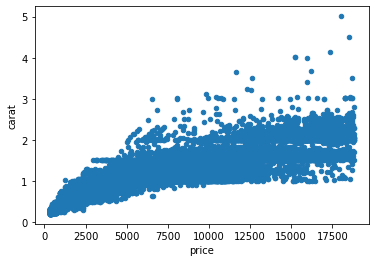

In [1]:
# Q1.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('diamonds.csv');

f = df.plot.scatter("price", "carat")
#f.get_figure().savefig('figs/Relationship of carat vs price')

[None]

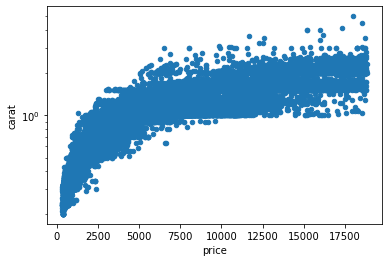

In [2]:
f = df.plot.scatter("price", "carat")
f.set(yscale="log")

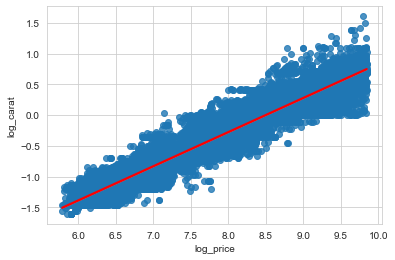

In [3]:
# Q2.

import math

#f = df.plot.scatter("carat", "price")
#f.set(yscale="log")
def log_function(x):
    return math.log(x)

df['log_price'] = df['price'].transform(log_function)
df['log_carat'] = df['carat'].transform(log_function)

# Show a scatterplot that visualizes the relationship between carat and price
sns.set_style("whitegrid")
#reg = sns.regplot(data=df,x='log_price', y='log_carat', line_kws={'color': 'red'}, scatter_kws={'alpha':0.005})
reg = sns.regplot(data=df,x='log_price', y='log_carat', line_kws={'color': 'red'})

In [8]:
from sklearn.metrics import explained_variance_score
import statsmodels.api as sm

X = df[['log_price']].copy() # Double square brackets returns the single column dataframe
y = df['log_carat'].copy() # Will be a numpy type array

# Fit regression model
results = sm.OLS(y, X).fit()

# Inspect the results and inspect R squared to comment on explained variance
print(results.summary())

# Title and save
fig = reg.get_figure()
fig.subplots_adjust(top=0.925)
fig.suptitle('Carat by Price (with Logarithmic Transformations)')
fig.savefig('figs/2_Log_Transformed_Carat_by_Price.png')

                                 OLS Regression Results                                
Dep. Variable:              log_carat   R-squared (uncentered):                   0.204
Model:                            OLS   Adj. R-squared (uncentered):              0.204
Method:                 Least Squares   F-statistic:                          1.382e+04
Date:                Thu, 10 Nov 2022   Prob (F-statistic):                        0.00
Time:                        10:45:54   Log-Likelihood:                         -51586.
No. Observations:               53940   AIC:                                  1.032e+05
Df Residuals:                   53939   BIC:                                  1.032e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [10]:
y_pred = results.predict(X)
print(y_pred)

0       -0.234838
1       -0.234838
2       -0.234963
3       -0.235822
4       -0.235943
           ...   
53935   -0.321479
53936   -0.321479
53937   -0.321479
53938   -0.321479
53939   -0.321479
Length: 53940, dtype: float64


In [14]:
print(y)
explained_variance_score(y, y_pred)

0       -1.469676
1       -1.560648
2       -1.469676
3       -1.237874
4       -1.171183
           ...   
53935   -0.328504
53936   -0.328504
53937   -0.356675
53938   -0.150823
53939   -0.287682
Name: log_carat, Length: 53940, dtype: float64


-0.140969791852793

In [21]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X, y)

from sklearn.model_selection import cross_val_score
print(cross_val_score(linear_regression, X, y, cv=10, scoring="explained_variance").mean())

0.733731416795891


In [20]:
X1 = df['price']
y1 = df['carat']

results1 = sm.OLS(y1, X1).fit()
y_pred1 = results.predict(X1)
print(y_pred1)
explained_variance_score(y_pred1, y1)

0        -13.229417
1        -13.229417
2        -13.269998
3        -13.554065
4        -13.594646
            ...    
53935   -111.881910
53936   -111.881910
53937   -111.881910
53938   -111.881910
53939   -111.881910
Length: 53940, dtype: float64


-0.005405194418137693

In [22]:
# Q3.

def simple_train_test_split(X, y, test_size=.3):
    n_training_samples = int((1.0 - test_size) * X.shape[0])

    X_train = X[:n_training_samples]
    y_train = y[:n_training_samples]

    X_test = X[n_training_samples:]
    y_test = y[n_training_samples:]

    return X_train, X_test, y_train, y_test

X = df[['carat']].copy()
# X['const'] = 1.
y = df['price'].copy()


X_train1, X_test1, y_train1, y_test1 = simple_train_test_split(X, y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)



print(X_train1)

       carat
0       0.23
1       0.21
2       0.23
3       0.29
4       0.31
...      ...
37753   0.38
37754   0.38
37755   0.38
37756   0.38
37757   0.38

[37758 rows x 1 columns]


In [23]:
results1 = sm.OLS(y_train1, X_train1).fit()

# Inspect the results and inspect R squared to comment on explained variance
print(results1.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                          3.483e+05
Date:                Thu, 10 Nov 2022   Prob (F-statistic):                        0.00
Time:                        10:52:26   Log-Likelihood:                     -3.4175e+05
No. Observations:               37758   AIC:                                  6.835e+05
Df Residuals:                   37757   BIC:                                  6.835e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [24]:
results2 = sm.OLS(y_train, X_train).fit()

# Inspect the results and inspect R squared to comment on explained variance
print(results2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                          2.800e+05
Date:                Thu, 10 Nov 2022   Prob (F-statistic):                        0.00
Time:                        10:52:32   Log-Likelihood:                     -3.3924e+05
No. Observations:               37758   AIC:                                  6.785e+05
Df Residuals:                   37757   BIC:                                  6.785e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [19]:
array = np.array(X_train)
  
# creating a list of index names

index_values = [0]*37758

for i in range(0,37758):
    index_values[i]=i
    
# creating a list of column names
column_values = ['carat']


df = pd.DataFrame(data = array, 
                  index = index_values, 
                  columns = column_values)


df['price'] = y_train
print(df)

       carat  price
0       1.01    NaN
1       1.54    NaN
2       1.15  327.0
3       0.41    NaN
4       0.54  335.0
...      ...    ...
37753   0.52  998.0
37754   0.70    NaN
37755   0.32    NaN
37756   0.41  998.0
37757   0.91  998.0

[37758 rows x 2 columns]
